In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_td=pd.read_excel('C:\\Users\\KIIT\\Desktop\\Quantium\\Task1\\Data\\QVI_transaction_data.xlsx')

In [3]:
df_pb=pd.read_csv('C:\\Users\\KIIT\\Desktop\\Quantium\\Task1\\Data\\QVI_purchase_behaviour.csv')

In [4]:
df_td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
df_pb.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [6]:
df_td['DATE']=pd.to_datetime(df_td['DATE'], origin='1899-12-30', unit='D')

In [7]:
df_td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [8]:
df_pb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
df_td.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [10]:
df_pb.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [11]:
df_td.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [12]:
df_pb.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [13]:
unique_prods=df_td['PROD_NAME'].unique()

In [14]:
print(unique_prods)

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

In [15]:
print(df_td['PROD_NAME'].value_counts())

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64


In [16]:
product_words = [word for product in unique_prods for word in product.split()]

In [17]:
product_words_df = pd.DataFrame(product_words, columns=['words'])
print(product_words_df)

           words
0        Natural
1           Chip
2         Compny
3    SeaSalt175g
4            CCs
..           ...
584         150g
585      Doritos
586        Salsa
587         Mild
588         300g

[589 rows x 1 columns]


In [18]:
word_counts = product_words_df['words'].value_counts()
print(word_counts)

175g               26
Chips              21
150g               19
&                  17
Smiths             16
                   ..
Fig                 1
Mac                 1
N                   1
Seasonedchicken     1
Bolognese           1
Name: words, Length: 220, dtype: int64


In [19]:
df_td['SALSA'] = df_td['PROD_NAME'].str.contains('salsa', case=False)

In [20]:
df_td=df_td[df_td['SALSA'] == False]

In [21]:
df_td=df_td.drop(columns=['SALSA'])

In [22]:
print(df_td)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

In [23]:
df_td.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [24]:
df_td.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


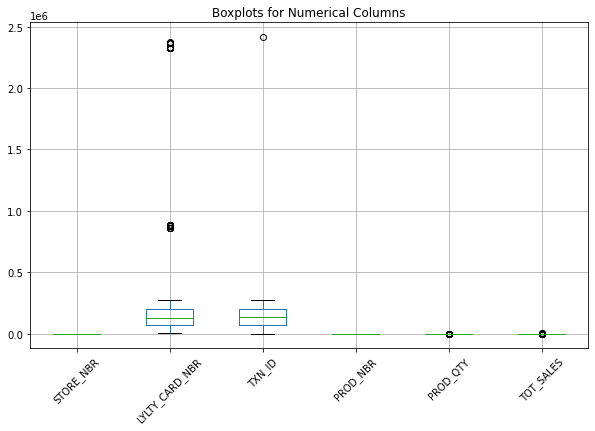

In [25]:
numerical_columns = df_td.select_dtypes(include=['float64', 'int64']).columns

df_td[numerical_columns].boxplot(figsize=(10, 6))
plt.title("Boxplots for Numerical Columns")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [26]:
count_200 = (df_td['PROD_QTY'] == 200).sum()
print(count_200)

2


In [27]:
filtered_df = df_td[df_td['PROD_QTY'] == 200]
product_qty_counts = filtered_df.groupby('PROD_NAME').size()
print(product_qty_counts)

PROD_NAME
Dorito Corn Chp     Supreme 380g    2
dtype: int64


In [28]:
print(df_td[df_td['PROD_QTY']==200])

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [29]:
filtered_data = df_td[df_td['LYLTY_CARD_NBR'] != 226000]
df_td=filtered_data
# Display the filtered data
df_td.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [30]:
transactions_by_date = df_td.groupby('DATE').size()
print(transactions_by_date)


DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Length: 364, dtype: int64


In [31]:
transactions_by_date.describe()

count    364.000000
mean     677.857143
std       33.687536
min      607.000000
25%      658.000000
50%      674.000000
75%      694.250000
max      865.000000
dtype: float64

In [32]:
complete_date_range = pd.date_range(start=df_td['DATE'].min(), end=df_td['DATE'].max())
actual_dates = pd.Series(df_td['DATE'].unique())
missing_dates = complete_date_range.difference(actual_dates)
print("Missing dates:\n", missing_dates)

Missing dates:
 DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)


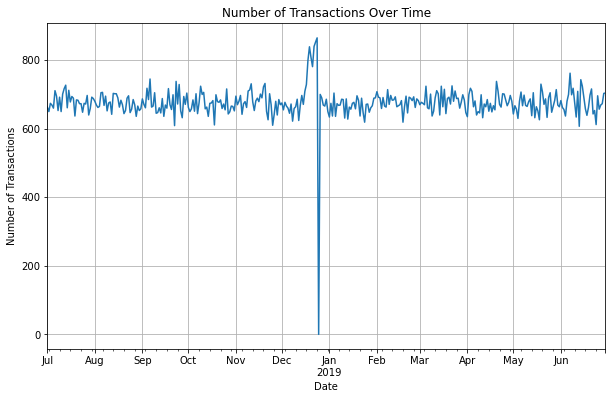

In [33]:
all_dates = pd.date_range(start=df_td['DATE'].min(), end=df_td['DATE'].max())
transactions_by_date = transactions_by_date.reindex(all_dates, fill_value=0)
plt.figure(figsize=(10, 6))
transactions_by_date.plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

In [34]:
import re
df_td['PACK_SIZE'] = df_td['PROD_NAME'].str.extract('(\d+)').astype(float)
pack_size_counts = df_td['PACK_SIZE'].value_counts().sort_index()
print(pack_size_counts)

70.0      1507
90.0      3008
110.0    22387
125.0     1454
134.0    25102
135.0     3257
150.0    40203
160.0     2970
165.0    15297
170.0    19983
175.0    66390
180.0     1468
190.0     2995
200.0     4473
210.0     6272
220.0     1564
250.0     3169
270.0     6285
330.0    12540
380.0     6416
Name: PACK_SIZE, dtype: int64


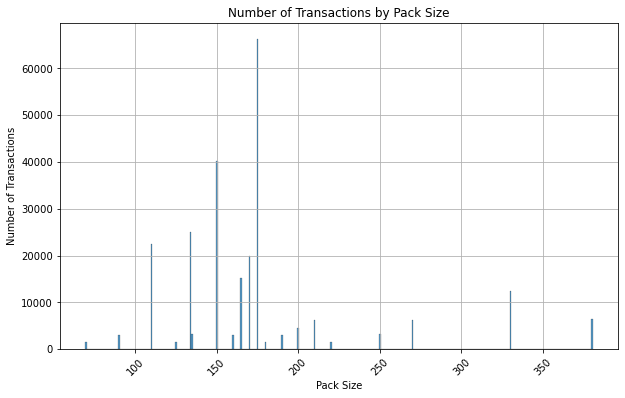

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df_td['PACK_SIZE'], bins=len(df_td['PACK_SIZE'].unique()), kde=False, discrete=True)
plt.title('Number of Transactions by Pack Size')
plt.xlabel('Pack Size')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

In [36]:
pack_size_counts = df_td['PACK_SIZE'].value_counts().sort_index()
print(pack_size_counts)

70.0      1507
90.0      3008
110.0    22387
125.0     1454
134.0    25102
135.0     3257
150.0    40203
160.0     2970
165.0    15297
170.0    19983
175.0    66390
180.0     1468
190.0     2995
200.0     4473
210.0     6272
220.0     1564
250.0     3169
270.0     6285
330.0    12540
380.0     6416
Name: PACK_SIZE, dtype: int64


In [37]:
df_td['BRAND'] = df_td['PROD_NAME'].str.split().str[0]
print(df_td[['PROD_NAME', 'BRAND']])

                                       PROD_NAME     BRAND
0         Natural Chip        Compny SeaSalt175g   Natural
1                       CCs Nacho Cheese    175g       CCs
2         Smiths Crinkle Cut  Chips Chicken 170g    Smiths
3         Smiths Chip Thinly  S/Cream&Onion 175g    Smiths
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g    Kettle
...                                          ...       ...
264831   Kettle Sweet Chilli And Sour Cream 175g    Kettle
264832             Tostitos Splash Of  Lime 175g  Tostitos
264833                  Doritos Mexicana    170g   Doritos
264834   Doritos Corn Chip Mexican Jalapeno 150g   Doritos
264835             Tostitos Splash Of  Lime 175g  Tostitos

[246740 rows x 2 columns]


In [38]:
print(df_td['BRAND'].unique())

['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'French' 'RRD' 'Tostitos'
 'Cheetos' 'Woolworths' 'Snbts' 'Sunbites']


In [39]:
print(df_td['BRAND'].value_counts())

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64


In [40]:
df_td.loc[df_td['BRAND'] == 'RED', 'BRAND'] = 'RRD'
print(df_td['BRAND'].unique())

['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'French' 'RRD' 'Tostitos'
 'Cheetos' 'Woolworths' 'Snbts' 'Sunbites']


In [41]:
merged_data = pd.merge(df_td, df_pb, how='left')

# Check if the number of rows in 'data' is the same as in 'transactionData'
if len(merged_data) == len(df_td):
    print("No duplicates were created, the number of rows is the same.")
else:
    print("Row count differs, possible duplicates or mismatches.")

No duplicates were created, the number of rows is the same.


In [42]:
merged_data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [43]:
merged_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,Tostitos,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos,YOUNG SINGLES/COUPLES,Premium


In [44]:
""""""file_path = "C:\\Users\\KIIT\\Desktop\\Quantium\\Task1\\Data"  
merged_data.to_csv(file_path + "merged_data_task1.csv", index=False)""""""

SyntaxError: invalid syntax (709543943.py, line 1)

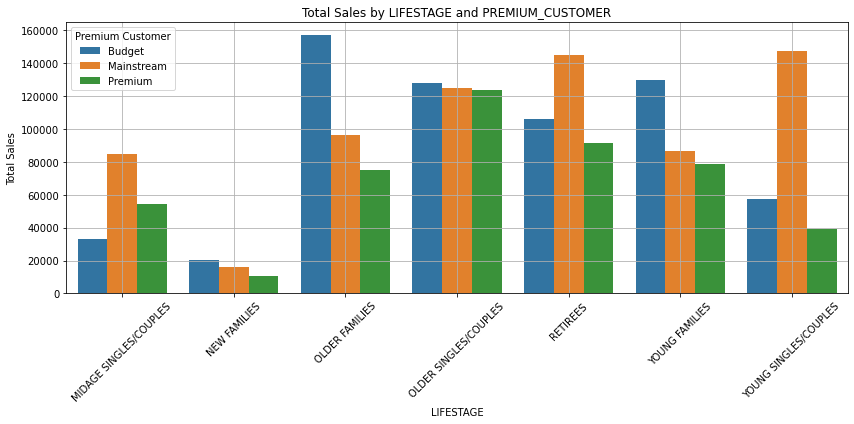

In [45]:
sales_summary = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=sales_summary, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.grid(True)
plt.tight_layout()
plt.show()

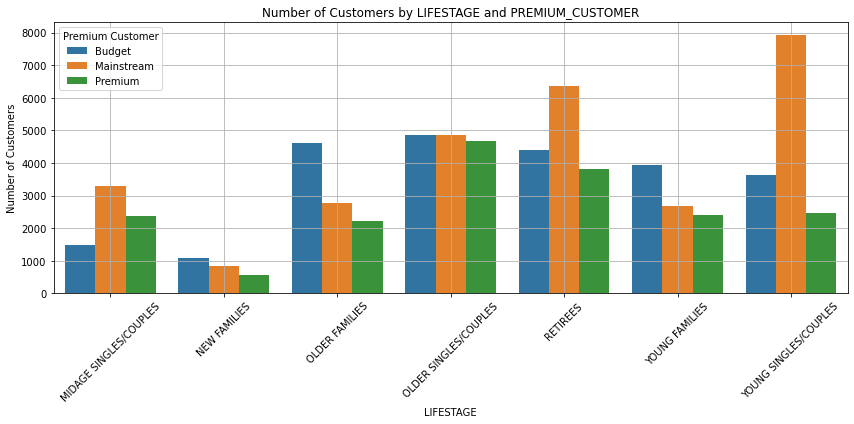

In [46]:
customer_summary = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customer_summary.rename(columns={'LYLTY_CARD_NBR': 'NUMBER_OF_CUSTOMERS'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=customer_summary, x='LIFESTAGE', y='NUMBER_OF_CUSTOMERS', hue='PREMIUM_CUSTOMER')
plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.grid(True)
plt.tight_layout()
plt.show()

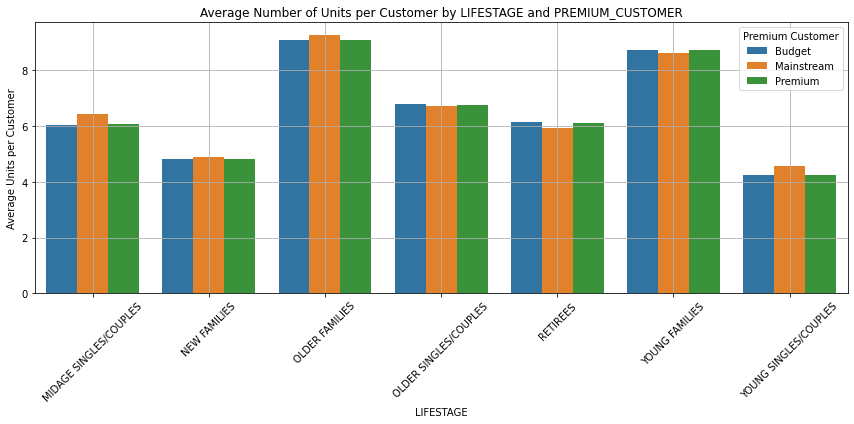

In [47]:
units_per_customer = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_units=('PROD_QTY', 'sum'),
    unique_customers=('LYLTY_CARD_NBR', 'nunique')
).reset_index()
units_per_customer['avg_units_per_customer'] = units_per_customer['total_units'] / units_per_customer['unique_customers']

plt.figure(figsize=(12, 6))
sns.barplot(data=units_per_customer, x='LIFESTAGE', y='avg_units_per_customer', hue='PREMIUM_CUSTOMER')
plt.title('Average Number of Units per Customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Units per Customer')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.grid(True)
plt.tight_layout()
plt.show()

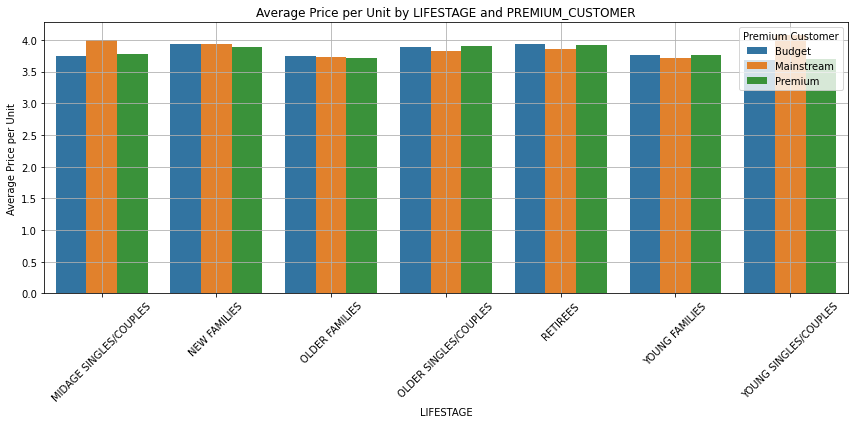

In [48]:
price_per_unit = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_sales=('TOT_SALES', 'sum'),
    total_units=('PROD_QTY', 'sum')
).reset_index()

price_per_unit['avg_price_per_unit'] = price_per_unit['total_sales'] / price_per_unit['total_units']

plt.figure(figsize=(12, 6))
sns.barplot(data=price_per_unit, x='LIFESTAGE', y='avg_price_per_unit', hue='PREMIUM_CUSTOMER')
plt.title('Average Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Price per Unit')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
from scipy.stats import ttest_ind

mainstream_customers = merged_data[merged_data['PREMIUM_CUSTOMER'] == 'Mainstream']['TOT_SALES']
premium_customers = merged_data[merged_data['PREMIUM_CUSTOMER'] == 'Premium']['TOT_SALES']

t_stat_mainstream_premium, p_val_mainstream_premium = ttest_ind(mainstream_customers, premium_customers, equal_var=False)

print(f"T-test between Mainstream and Premium customers:")
print(f"T-statistic: {t_stat_mainstream_premium:.4f}, P-value: {p_val_mainstream_premium:.4f}")

budget_midage_customers = merged_data[(merged_data['LIFESTAGE'] == 'Budget Midage')]['TOT_SALES']
young_singles_couples_customers = merged_data[(merged_data['LIFESTAGE'] == 'Young Singles/Couples')]['TOT_SALES']

t_stat_budget_young, p_val_budget_young = ttest_ind(budget_midage_customers, young_singles_couples_customers, equal_var=False)

print(f"T-test between Budget Midage and Young Singles/Couples customers:")
print(f"T-statistic: {t_stat_budget_young:.4f}, P-value: {p_val_budget_young:.4f}")

T-test between Mainstream and Premium customers:
T-statistic: 7.2594, P-value: 0.0000
T-test between Budget Midage and Young Singles/Couples customers:
T-statistic: nan, P-value: nan


Found 19544 records for Mainstream - Young Singles/Couples segment.


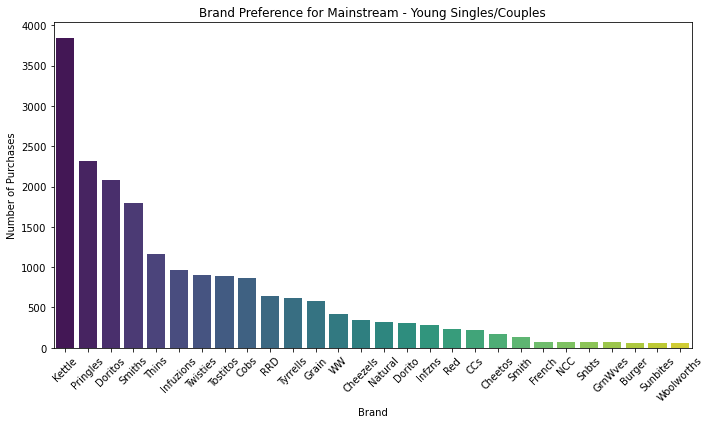

In [55]:
mainstream_young_singles_couples = merged_data[
    (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream') &
    (merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')
]

if mainstream_young_singles_couples.empty:
    print("No records found for Mainstream - Young Singles/Couples segment.")
else:
    print(f"Found {len(mainstream_young_singles_couples)} records for Mainstream - Young Singles/Couples segment.")
    
    brand_preference = mainstream_young_singles_couples['BRAND'].value_counts().reset_index()
    brand_preference.columns = ['BRAND', 'COUNT']
    
    brand_preference = brand_preference.sort_values(by='COUNT', ascending=False)
    
    if brand_preference.empty:
        print("No brand data available for the selected segment.")
    else:
        # Step 4: Plot the results
        plt.figure(figsize=(10, 6))
        sns.barplot(data=brand_preference, x='BRAND', y='COUNT', palette='viridis')
        plt.title('Brand Preference for Mainstream - Young Singles/Couples')
        plt.xlabel('Brand')
        plt.ylabel('Number of Purchases')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

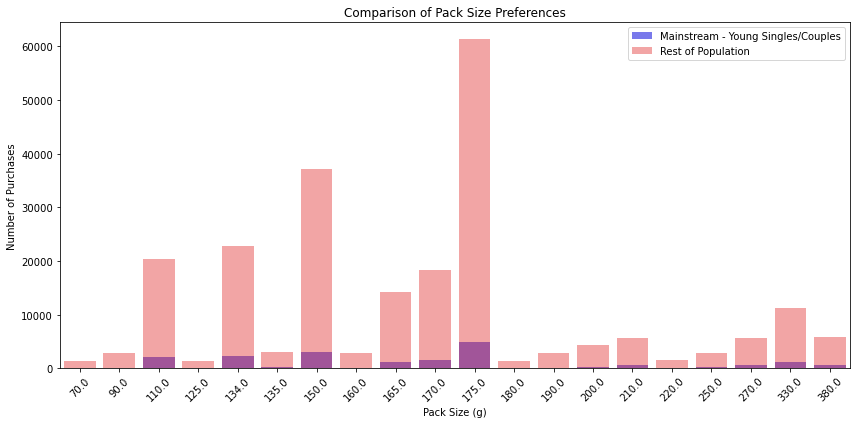

In [57]:
mainstream_young_singles_couples = merged_data[
    (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream') &
    (merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')
]

rest_of_population = merged_data[
    ~((merged_data['PREMIUM_CUSTOMER'] == 'Mainstream') &
    (merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES'))
]

pack_size_target_segment = mainstream_young_singles_couples['PACK_SIZE'].value_counts().reset_index()
pack_size_target_segment.columns = ['PACK_SIZE', 'COUNT']

pack_size_rest_population = rest_of_population['PACK_SIZE'].value_counts().reset_index()
pack_size_rest_population.columns = ['PACK_SIZE', 'COUNT']

plt.figure(figsize=(12, 6))

sns.barplot(data=pack_size_target_segment, x='PACK_SIZE', y='COUNT', color='blue', alpha=0.6, label='Mainstream - Young Singles/Couples')

sns.barplot(data=pack_size_rest_population, x='PACK_SIZE', y='COUNT', color='red', alpha=0.4, label='Rest of Population')

plt.title('Comparison of Pack Size Preferences')
plt.xlabel('Pack Size (g)')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()